In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplot inline

In [3]:
df =pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [133]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_X = sx.fit_transform(df.drop('price',axis = 1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [134]:
scaled_X.shape

(20, 2)

In [135]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [136]:
scaled_y.shape

(20, 1)

In [124]:
w = np.ones(shape = (2))
w.shape

(2,)

In [230]:
def batch_gd(X,y_true,epochs,l_r = 0.01):
    n_col = X.shape[1]
    w = np.ones(shape = (n_col))
    b=0
    n_raw = X.shape[0]
    cost = []
    epoch = []
    for i in range(epochs):
        y_p = np.dot(w,X.T)+b
        w_grad = -(2/n_raw)*(X.T.dot(y_true- y_p))
        b_grad = -(2/n_raw)*np.sum(y_true-y_p)
        w = w - l_r * w_grad
        b = b - l_r * b_grad
        
        mse = np.mean(np.square(y_true-y_p))
        if i%10 ==0:
            cost.append(mse)
            epoch.append(i)
    return w,b,mse,cost,epoch
w,b,mse,cost,epoch = bgd(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)      
w,b,mse

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

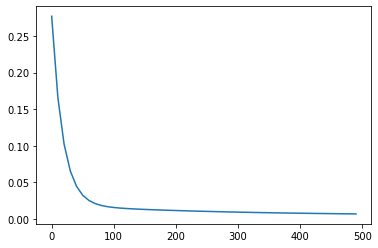

In [231]:
plt.plot(epoch,cost)

In [232]:
def predict(area,bathrooms,w,b):
    scaled_X = sx.transform([[area,bathrooms]])[0]
    scaled_price  = w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]
    
predict(2600,4,w,b)

128.45484403267596

In [233]:
predict(1000,2,w,b)

30.253094462442355

In [155]:
predict(1000,3,w,b)

53.01967220645994

In [192]:
predict(1500,2,w,b)

46.71203011312936

In [207]:
import random
random.randint(0,6)

1

In [234]:
def stochastic_gd(X,y_true,epochs,l_r = 0.01):
    n_col = X.shape[1]
    w = np.ones(shape = (n_col))
    b=0
    n_raw = X.shape[0]
    cost = []
    epoch = []
    for i in range(epochs):
        random_index = random.randint(0,n_raw-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_p = np.dot(w,sample_x.T)+b
        w_grad = -(2/n_raw)*(sample_x.T.dot(sample_y- y_p))
        b_grad = -(2/n_raw)*(sample_y-y_p)
        w = w - l_r * w_grad
        b = b - l_r * b_grad
        
        mse = np.mean(np.square(sample_y-y_p))
        if i%100 ==0:
            cost.append(mse)
            epoch.append(i)
    return w,b,mse,cost,epoch

w_sgd,b_sgd,mse_sgd,cost_sgd,epoch_sgd = sgd(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)      
w_sgd,b_sgd,mse_sgd

(array([0.70422117, 0.67108277]), -0.22874610322922498, 0.0022500897694853594)

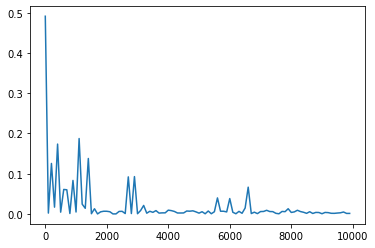

In [235]:
plt.plot(epoch_sgd,cost_sgd)

In [236]:
predict(2600,4,w_sgd,b_sgd)

128.07528400203043

In [237]:
def mini_batch_gd(X,y_true,epochs,l_r = 0.01):
    n_col = X.shape[1]
    w = np.ones(shape = (n_col))
    b=0
    n_raw = X.shape[0]
    cost = []
    epoch = []
    s_x = []
    s_y = []
    for i in range(epochs):
        for i in range(0,5):
            n = random.randint(0,n_raw-1)
            s_x.append(X[n])
            s_y.append(y_true[n])
        sample_x = np.array(s_x)
        sample_y = np.array(s_y)
        y_p = np.dot(w,sample_x.T)+b
        w_grad = -(2/n_raw)*(sample_x.T.dot(sample_y- y_p))
        b_grad = -(2/n_raw)*np.sum(sample_y-y_p)
        w = w - l_r * w_grad
        b = b - l_r * b_grad
        
        mse = np.mean(np.square(sample_y-y_p))
        if i%100 ==0:
            cost.append(mse)
            epoch.append(i)
    return w,b,mse,cost,epoch

w_mbgd,b_mbgd,mse_mbgd,cost_mbgd,epoch_mbgd = sgd(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)      
w_mbgd,b_mbgd,mse_mbgd

(array([0.70464817, 0.67263896]), -0.22680347189071293, 0.0020301068577638095)

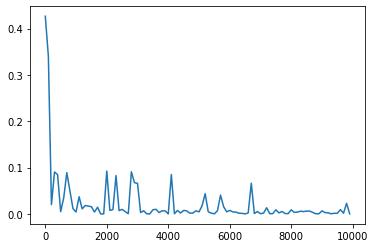

In [239]:
plt.plot(epoch_mbgd,cost_mbgd)

In [240]:
predict(2600,4,w_mbgd,b_mbgd)

128.53088325263937